# For Classification:

## Accuracy
The most straightforward metric. It measures the overall correctness of the model's predictions.  Calculated as: (Number of correct predictions) / (Total number of predictions).

Advantages: Easy to understand and interpret.
Disadvantages: Can be misleading if the classes are imbalanced (e.g., one class has many more examples than others).
## Precision
Measures how many of the positive predictions were actually correct.  It focuses on the quality of positive predictions. Calculated as: (Number of true positives) / (Number of true positives + Number of false positives).

Advantages: Useful when minimizing false positives is important (e.g., spam detection).
Disadvantages: Doesn't consider false negatives. A model with high precision might miss many actual positive cases.
## Recall (Sensitivity or True Positive Rate)
Measures how many of the actual positive cases were correctly predicted.  It focuses on the model's ability to find all the positives. Calculated as: (Number of true positives) / (Number of true positives + Number of false negatives).

Advantages: Useful when minimizing false negatives is crucial (e.g., disease detection).
Disadvantages: Doesn't consider false positives. A model with high recall might have many false positives.
## F1-score
The harmonic mean of precision and recall. It provides a balanced measure that considers both false positives and false negatives. Calculated as: 2 * (Precision * Recall) / (Precision + Recall).   

Advantages: Useful when you want a good balance between precision and recall.
Disadvantages: Not as interpretable as precision or recall alone.
## AUC (Area Under the ROC Curve)
Measures the ability of the classifier to distinguish between classes at different thresholds.  It plots the True Positive Rate (Recall) against the False Positive Rate at various thresholds.  An AUC of 1 is perfect, and 0.5 is random chance.

Advantages: Less sensitive to class imbalance than accuracy. Provides a good overall measure of performance.
Disadvantages: Can be less intuitive than other metrics.
## Confusion Matrix
A table that summarizes the model's predictions. It shows the counts of true positives, true negatives, false positives, and false negatives.

Advantages: Provides a complete picture of the model's performance, showing where it makes mistakes.
Disadvantages: Can be a bit overwhelming for quick comparisons, especially with many classes.
Classification Report: A summary that includes precision, recall, F1-score, and support (number of samples) for each class. Often presented alongside the confusion matrix.

## Log Loss (Cross-Entropy Loss)
A common loss function used in classification.  It measures the difference between the predicted probability distribution and the true distribution.  Lower log loss is better.  It is often used during training as well as for evaluation.

# For Regression:

## Mean Squared Error (MSE)
The average of the squared differences between the predicted and actual values.  Sensitive to outliers.  Lower MSE is better.

## Root Mean Squared Error (RMSE)
The square root of the MSE.  It's in the same units as the target variable, making it easier to interpret. Lower RMSE is better.

## Mean Absolute Error (MAE)
The average of the absolute differences between the predicted and actual values.  Less sensitive to outliers than MSE. Lower MAE is better.

## R-squared (Coefficient of Determination)
Measures the proportion of the variance in the target variable that is predictable from the features.  Ranges from 0 to 1.  Higher R-squared is better.   

# Other Important Considerations

## Class Imbalance
If your classes are imbalanced, choose metrics that are less sensitive to this issue, such as AUC, F1-score (with appropriate averaging), or look at the metrics for each class individually.
## Business Goals
The best metric ultimately depends on your specific business goals. For example, if minimizing false positives is critical, you might prioritize precision.
Context: Consider the context of your problem. What are the costs associated with different types of errors (false positives vs. false negatives)? This will help you choose the most relevant metric.
## Multiple Metrics
It's often a good idea to consider multiple metrics to get a well-rounded view of your model's performance.
Remember to choose the metrics that best align with your specific task and objectives. Don't rely on just one metric; consider a combination for a more comprehensive evaluation.


In [38]:
import pandas as pd
df = pd.read_csv("Data/diabetes.csv")

In [39]:
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [40]:
df = df.drop(['year','gender','location','clinical_notes', 'smoking_history','race:AfricanAmerican','race:Asian','race:Caucasian','race:Hispanic','race:Other',  ], axis =1)

In [41]:
df.describe()

,age,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [42]:
type(df)

pandas.core.frame.DataFrame

In [43]:
X = df.iloc[:,:-1]  # Select all rows and all columns except the last one
y = df.iloc[:, -1] 

print( X.shape, " ", y.shape)

(100000, 6)   (100000,)


In [44]:
df.head()

,age,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
0,32.0,0,0,27.32,5.0,100,0
1,29.0,0,0,19.95,5.0,90,0
2,18.0,0,0,23.76,4.8,160,0
3,41.0,0,0,27.32,4.0,159,0
4,52.0,0,0,23.75,6.5,90,0


In [45]:
type(X)

pandas.core.frame.DataFrame

In [46]:
X.shape

(100000, 6)

In [47]:
X = X.to_numpy()

In [48]:
X.shape

(100000, 6)

In [49]:
y = y.to_numpy()
y.shape

(100000,)

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
y_train.shape

(80000,)

In [60]:
X_train.shape

(80000, 6)

Epoch 1/20
2000/2000 [==============================] - 2s 1ms/step - loss: 0.4505 - Accuracy: 0.9001 - val_loss: 0.2692 - val_Accuracy: 0.9146
Epoch 2/20
2000/2000 [==============================] - 2s 948us/step - loss: 0.2680 - Accuracy: 0.9169 - val_loss: 0.2390 - val_Accuracy: 0.9254
Epoch 3/20
2000/2000 [==============================] - 2s 954us/step - loss: 0.2390 - Accuracy: 0.9250 - val_loss: 0.2177 - val_Accuracy: 0.9331
Epoch 4/20
2000/2000 [==============================] - 2s 972us/step - loss: 0.2257 - Accuracy: 0.9270 - val_loss: 0.1991 - val_Accuracy: 0.9334
Epoch 5/20
2000/2000 [==============================] - 2s 937us/step - loss: 0.2030 - Accuracy: 0.9302 - val_loss: 0.1818 - val_Accuracy: 0.9330
Epoch 6/20
2000/2000 [==============================] - 2s 983us/step - loss: 0.1824 - Accuracy: 0.9345 - val_loss: 0.1522 - val_Accuracy: 0.9398
Epoch 7/20
2000/2000 [==============================] - 2s 938us/step - loss: 0.1694 - Accuracy: 0.9398 - val_loss: 0.1727 - v

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

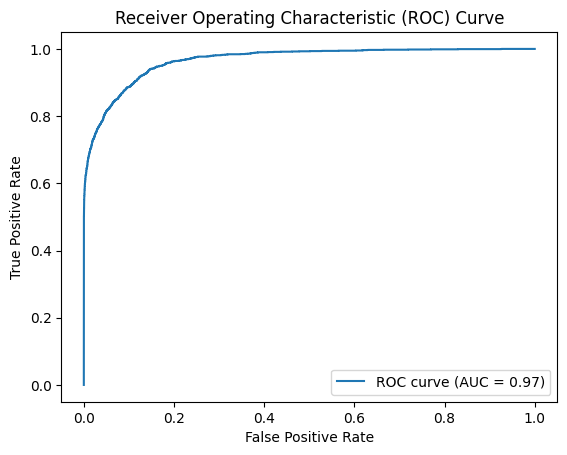

In [62]:
# Define the model (using softmax output)
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(6,)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  
])

# Compile the model (CategoricalCrossentropy loss and metrics)
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Important for multi-class with integer labels
              metrics=['Accuracy'])  # Only Accuracy here if labels are integers

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_probs = model.predict(X_test) # Get probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Get predicted class labels

# Calculate metrics (using sklearn)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (macro): {precision}")
print(f"Recall (macro): {recall}")
print(f"F1-score (macro): {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test,y_pred_probs)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
#plt.plot(,, 'k--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

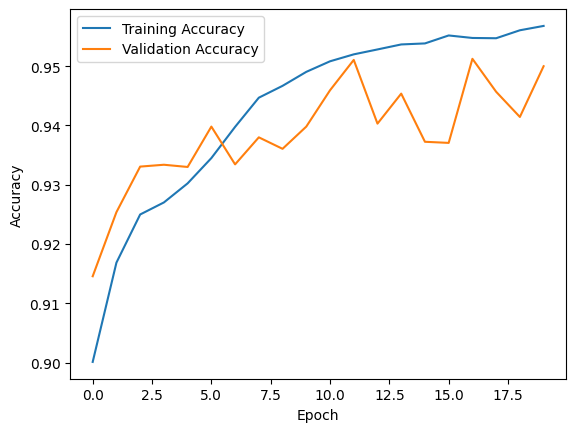

In [63]:
plt.plot(history.history['Accuracy'], label='Training Accuracy')
plt.plot(history.history['val_Accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()